# **Brain and Cognitive Society, IIT Kanpur**
## **Introduction to Deep Learning Workshop**
**This python notebook is an assingment on ML/DL**

In this assingment you will solve a **regression** problem of predicting House prices using basic python libraries, and build a **neural network** for handwritten digit identification using **TensorFlow**

## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [2]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2023-06-05 16:56:51--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 172.217.218.101, 172.217.218.113, 172.217.218.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.218.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/epa27dkp1ngm90i9iop57nqldqdh1jr9/1685984175000/17346214133729595847/*/16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct?e=download&uuid=88bd08ae-937a-4bad-ad0b-ef305e7b99fc [following]
--2023-06-05 16:56:53--  https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/epa27dkp1ngm90i9iop57nqldqdh1jr9/1685984175000/17346214133729595847/*/16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct?e=download&uuid=88bd08ae-937a-4bad-ad0b-ef305e7b99fc
Resolving doc-14-3o-docs.googleusercontent.com (doc-14-3o-docs.googleusercontent.com)... 108.177.96.132, 2a00:1

In [3]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [4]:
data_df['date'] = data_df['date'].str.replace('T000000','')                 # Remove T000000 part from data column. Hint: search about .str.replace() method. :) 
data_df['date'] = data_df['date'].astype(int)                  
data_df2 = data_df.drop(['id'],axis = 1)
data_array = np.array(data_df2)                                              # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [5]:
mean = np.array(data_array.mean(axis=0))                                # this should be an array, each entry should be mean of a column
sd = np.array(data_array.std(axis=0))                                    # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [6]:
labels = data_df['price']                                                                                                            # extract the price column from data

x_array_norm = np.delete(data_array_norm,1,1)                                                                                                    # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [7]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth
  
  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean((y_true - y_pred)**2)                    # fill code here

  return mse

In [8]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  
  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x, a) + b                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [9]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)

  da =  (2/m)* np.sum(np.multiply(x,(yp-y_true)[:,np.newaxis]),axis=0)           # write code to calculate derivative of loss with respect to a
  db = (2/m) * np.sum((yp - y_true))              # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [10]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)
  
  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.zeros((n,))                                 # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    da, db = gradient(x,a,b,y_true)
    yp = y(x,a,b)
    # updating 
    a = a-learning_rate * da
    b = b-learning_rate * db
    l_mse = loss(yp,y_true)                                # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)
  
  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training** 

In [13]:
epochs = 100          # tweak this!!!
learn_rate = 0.1     # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b= gradient_descent(x_train,y_train,learn_rate,epochs)

<ipython-input-9-79c5c346dae6>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  da =  (2/m)* np.sum(np.multiply(x,(yp-y_true)[:,np.newaxis]),axis=0)           # write code to calculate derivative of loss with respect to a


Epoch  1  Completed! loss =  421333293468.0863
Epoch  2  Completed! loss =  244360506743.70023
Epoch  3  Completed! loss =  168789332657.9613
Epoch  4  Completed! loss =  122147956608.20099
Epoch  5  Completed! loss =  92739827325.73863
Epoch  6  Completed! loss =  73986765253.9325
Epoch  7  Completed! loss =  61946467389.764
Epoch  8  Completed! loss =  54178543225.135796
Epoch  9  Completed! loss =  49145545123.8437
Epoch  10  Completed! loss =  45869749762.12248
Epoch  11  Completed! loss =  43726180190.05453
Epoch  12  Completed! loss =  42314117263.21841
Epoch  13  Completed! loss =  41376084920.49848
Epoch  14  Completed! loss =  40746348417.03962
Epoch  15  Completed! loss =  40318031105.11234
Epoch  16  Completed! loss =  40022067785.95285
Epoch  17  Completed! loss =  39813713826.94785
Epoch  18  Completed! loss =  39663888288.22123
Epoch  19  Completed! loss =  39553613897.16837
Epoch  20  Completed! loss =  39470442792.99601
Epoch  21  Completed! loss =  39406156522.50079
Ep

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


<ipython-input-9-79c5c346dae6>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  da =  (2/m)* np.sum(np.multiply(x,(yp-y_true)[:,np.newaxis]),axis=0)           # write code to calculate derivative of loss with respect to a


Epoch  1  Completed! loss =  455586429416.9821
Epoch  2  Completed! loss =  258645509395.54788
Epoch  3  Completed! loss =  180005296638.34177
Epoch  4  Completed! loss =  132118562808.21773
Epoch  5  Completed! loss =  102025601424.30136
Epoch  6  Completed! loss =  82837288651.31511
Epoch  7  Completed! loss =  70498973728.09819
Epoch  8  Completed! loss =  62518798601.36399
Epoch  9  Completed! loss =  57330713186.8151
Epoch  10  Completed! loss =  53939209447.46355
Epoch  11  Completed! loss =  51707636099.06545
Epoch  12  Completed! loss =  50227402980.23258
Epoch  13  Completed! loss =  49235639275.34057
Epoch  14  Completed! loss =  48562862699.86923
Epoch  15  Completed! loss =  48099558913.4061
Epoch  16  Completed! loss =  47774780534.83874
Epoch  17  Completed! loss =  47542420239.37668
Epoch  18  Completed! loss =  47372395398.130486
Epoch  19  Completed! loss =  47244980786.12053
Epoch  20  Completed! loss =  47147161121.51878
Epoch  21  Completed! loss =  47070280653.9941

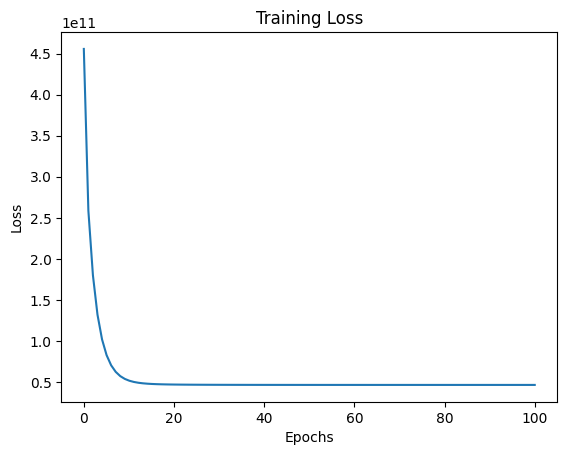

In [14]:
test_loss = gradient_descent(x_test,y_test,learn_rate,epochs)
print("Loss on test data = ",test_loss)
epo=np.linspace(0,epochs,epochs)

plt.plot(epo,test_loss[0])                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [15]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [16]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 [==============================] - 1s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 3       5       9       9       1       

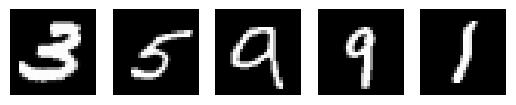

In [17]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [18]:
# Flatten the images into 1-d vectors
x_train = x_train/256
x_test = x_test/256

x_train_flatten = x_train.reshape(60000,784)  
x_test                                     # flatten the images of training set
x_test_flatten = x_test.reshape(10000,784)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000 
x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train,test_size=1/6,random_state=42,shuffle=True)
x_validation = x_validation.reshape(10000,784)
x_train_flatten = x_train.reshape(50000,784)                                      # choose number of images to be used for validation
print(x_train.shape, y_train.shape)


(50000, 28, 28) (50000,)


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [19]:
model = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')]
    )

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f82ea2ab520>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [20]:
from keras import losses, optimizers, metrics
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy',metrics=["accuracy"])

n_epochs = 10              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_flatten,y_train,epochs=10,validation_data=(x_validation,y_validation))
print(history.history.keys())

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.5015 - accuracy: 0.8698 - val_loss: 0.3275 - val_accuracy: 0.9092
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.9129 - val_loss: 0.2931 - val_accuracy: 0.9162
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2905 - accuracy: 0.9197 - val_loss: 0.2851 - val_accuracy: 0.9189
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2789 - accuracy: 0.9226 - val_loss: 0.2748 - val_accuracy: 0.9207
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2709 - accuracy: 0.9247 - val_loss: 0.2723 - val_accuracy: 0.9213
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9269 - val_loss: 0.2707 - val_accuracy: 0.9231
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2620 - accuracy: 0.9274 - val_loss: 0.2662 - val_accuracy:

### **Evaluate**
Evaluate your model on test data.

And Show some results

1000/1000 [==============================] - 2s 2ms/step - loss: 0.2642 - accuracy: 0.9260
Loss =  0.2642354667186737
Accuracy =  92.59999990463257 %


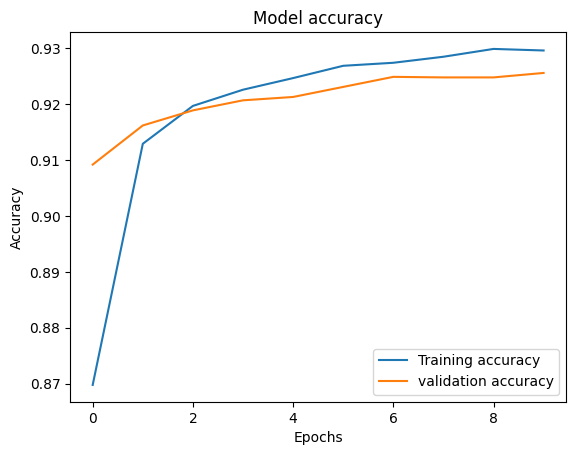

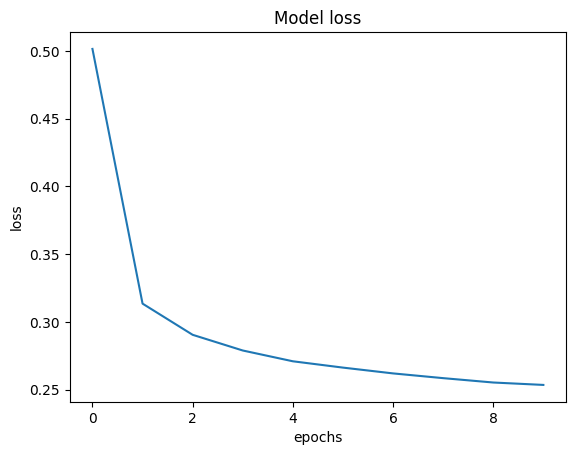

In [21]:
results = model.evaluate(x_test_flatten,y_test, 10)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot([i for i in range(n_epochs)],history.history['accuracy'], label="Training accuracy")
plt.plot([i for i in range(n_epochs)],history.history['val_accuracy'],label="validation accuracy" )
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot([i for i in range(n_epochs)],history.history['loss'], label="loss")
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()



Lets show our results on images from testing dataset

label: 7       9       1       2       6       [7861 4213 5666 5934   22]


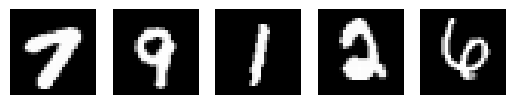

Predicted value: 
313/313 [==============================] - 0s 1ms/step
6 

In [28]:
n = 5   # = no. of images to see predictions on
index = np.random.choice(x_test.shape[0],5)  # choose random index from test data
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")
print(index)
    

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is highest..
    di = model.predict(x_test_flatten)
    digit = np.argmax(di[ind])

    print(digit,end=" ")
    

That's it you have completed the assignment !!

We hope that you learned something from this exercise

### Credits:

**Leaders:**

Mohit Kulkarni

Shivanshu Tyagi

**Scretaries:**

Sahil Bansal

Shashwat Gupta

Rashmi Sharma